# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \% 5$
2) $N^2 \% 5 + 5$
где $N$ - номер в списке

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('students_simple.csv')
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

# Выбор столбцов
col1 = df.iloc[:, 4]  # Столбец 4
col2 = df.iloc[:, 6]  # Столбец 6

print(f"\nАнализируемые столбцы: {df.columns[4]} и {df.columns[6]}")
print(f"Размеры: {len(col1)} записей")

Размер датасета: (20, 10)

Первые 5 строк:
   height  mass  income   iq  pages  age    bmi  work_exp  friends  test_time
0     159    45     430   95     24   20  3.533        26        5        8.5
1     160    61     640  115     32   25  2.623        63        7        6.2
2     161    56     610  111     24   28  2.875        94       10        6.8
3     162    48     330   97     24   19  3.375        16        4       12.0
4     162    54     420  105     60   23  3.000        49        2        7.5

Анализируемые столбцы: pages и bmi
Размеры: 20 записей


## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла


In [4]:
# 1.1 Коэффициент Фехнера
def fechner_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_dev = np.sign(x - x_mean)
    y_dev = np.sign(y - y_mean)
    
    concordant = np.sum(x_dev == y_dev)
    discordant = np.sum(x_dev != y_dev)
    
    return (concordant - discordant) / (concordant + discordant)

fechner = fechner_corr(col1, col2)
print(f"1.1 Коэффициент Фехнера: {fechner:.4f}")

# 1.2 Коэффициент Пирсона с доверительным интервалом
pearson_corr, p_value = stats.pearsonr(col1, col2)
n = len(col1)
# Доверительный интервал Фишера
z = np.arctanh(pearson_corr)
se = 1 / np.sqrt(n - 3)
z_lower = z - 1.96 * se
z_upper = z + 1.96 * se
ci_lower = np.tanh(z_lower)
ci_upper = np.tanh(z_upper)

print(f"1.2 Коэффициент Пирсона: {pearson_corr:.4f}")
print(f"   p-value: {p_value:.4f}")
print(f"   95% доверительный интервал: [{ci_lower:.4f}, {ci_upper:.4f}]")

# 1.3 Коэффициент Спирмена
spearman_corr, spearman_p = stats.spearmanr(col1, col2)
print(f"1.3 Коэффициент Спирмена: {spearman_corr:.4f}")
print(f"   p-value: {spearman_p:.4f}")

# 1.4 Коэффициент Кенделла
kendall_corr, kendall_p = stats.kendalltau(col1, col2)
print(f"1.4 Коэффициент Кенделла: {kendall_corr:.4f}")
print(f"   p-value: {kendall_p:.4f}")

1.1 Коэффициент Фехнера: -0.4000
1.2 Коэффициент Пирсона: -0.1795
   p-value: 0.4489
   95% доверительный интервал: [-0.5763, 0.2857]
1.3 Коэффициент Спирмена: -0.3239
   p-value: 0.1635
1.4 Коэффициент Кенделла: -0.2442
   p-value: 0.1538


## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

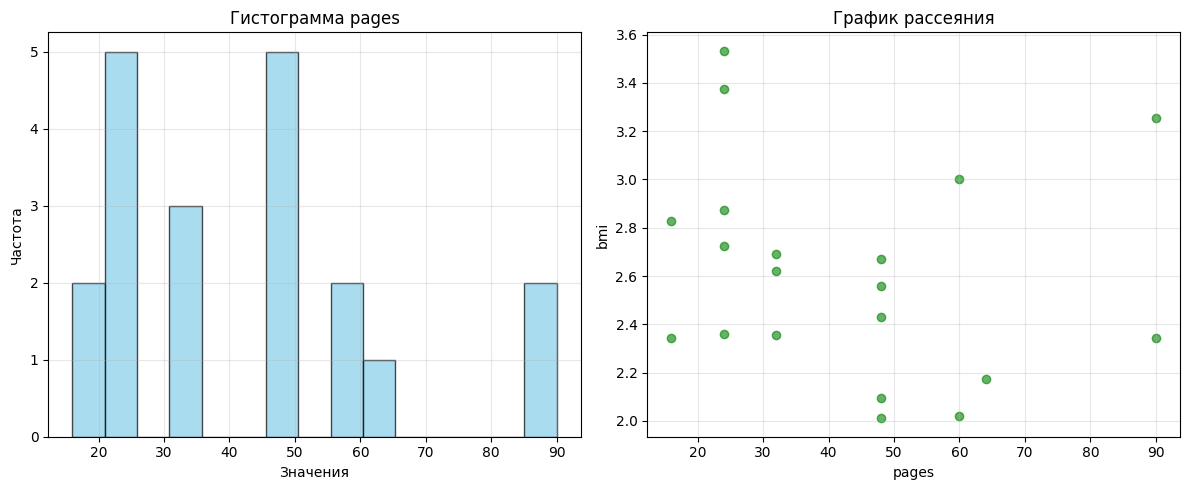

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2.1 Гистограммы
axes[0].hist(col1, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title(f'Гистограмма {df.columns[4]}')
axes[0].set_xlabel('Значения')
axes[0].set_ylabel('Частота')

# 2.2 График рассеяния
axes[1].scatter(col1, col2, alpha=0.6, color='green')
axes[1].set_title('График рассеяния')
axes[1].set_xlabel(f'{df.columns[4]}')
axes[1].set_ylabel(f'{df.columns[6]}')

for ax in axes:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

3.1 Линейная: y = -0.0036x + 2.7650, R² = 0.0322
3.2 Квадратичная: y = 0.0003x² + -0.0371x + 3.4518, R² = 0.1830
3.3 Гиперболическая: y = 7.3407/x + 2.3922, R² = 0.0670
3.4 Показательная: y = 2.7824 * 0.9985ˣ, R² = 0.0346


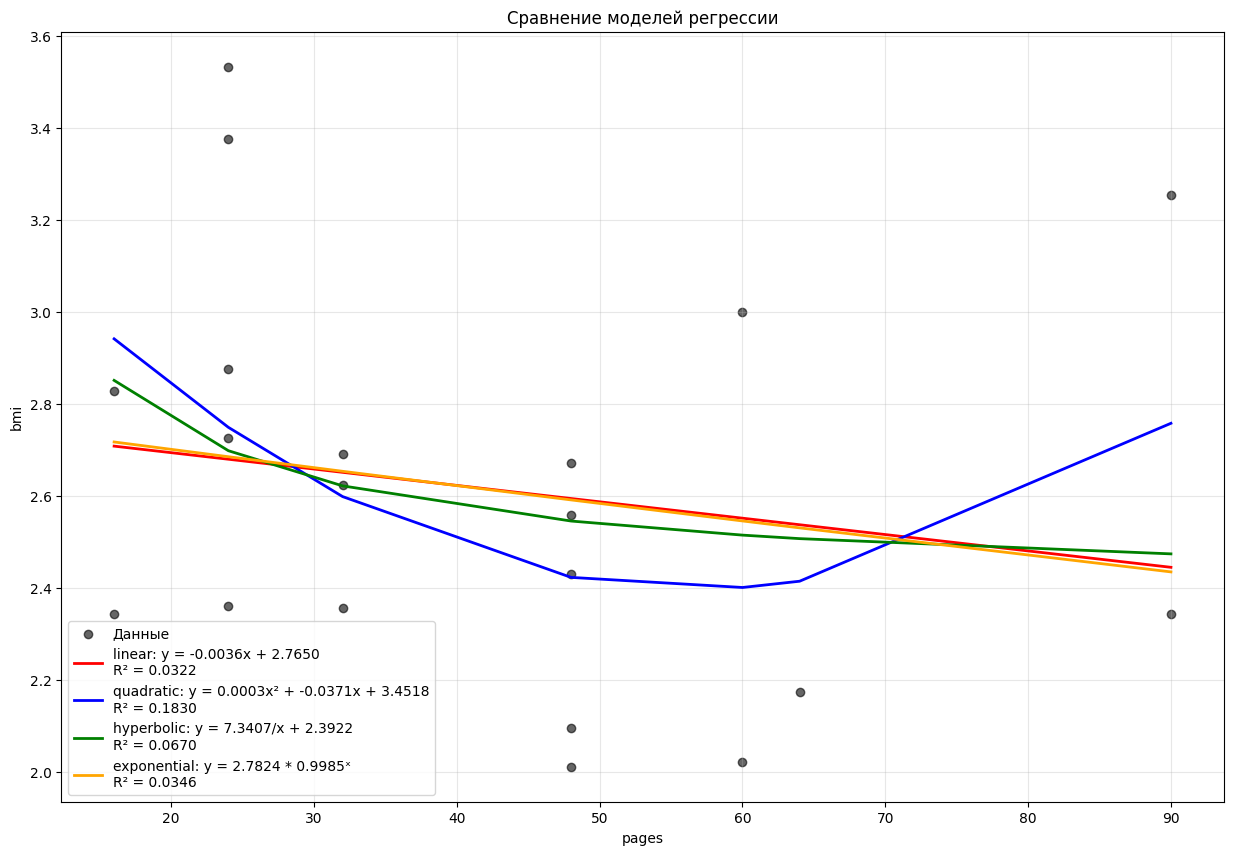

In [6]:
# Функции для регрессии
def linear_func(x, w1, w0):
    return w1 * x + w0

def quadratic_func(x, w2, w1, w0):
    return w2 * x**2 + w1 * x + w0

def hyperbolic_func(x, w1, w0):
    return w1 / x + w0

def exponential_func(x, w1, w0):
    return w0 * (w1 ** x)

# Подготовка данных
x_data = col1.values
y_data = col2.values

# Удаляем NaN и бесконечные значения
mask = ~(np.isnan(x_data) | np.isnan(y_data) | np.isinf(x_data) | np.isinf(y_data))
x_clean = x_data[mask]
y_clean = y_data[mask]

results = {}

try:
    # Линейная регрессия
    popt_linear, pcov_linear = curve_fit(linear_func, x_clean, y_clean)
    results['linear'] = {
        'params': popt_linear,
        'func': linear_func,
        'equation': f"y = {popt_linear[0]:.4f}x + {popt_linear[1]:.4f}",
        'r_squared': 1 - np.sum((y_clean - linear_func(x_clean, *popt_linear))**2) / np.sum((y_clean - np.mean(y_clean))**2)
    }
    print(f"3.1 Линейная: {results['linear']['equation']}, R² = {results['linear']['r_squared']:.4f}")
except:
    print("3.1 Линейная: не удалось построить")

try:
    # Квадратичная регрессия
    popt_quad, pcov_quad = curve_fit(quadratic_func, x_clean, y_clean, maxfev=5000)
    results['quadratic'] = {
        'params': popt_quad,
        'func': quadratic_func,
        'equation': f"y = {popt_quad[0]:.4f}x² + {popt_quad[1]:.4f}x + {popt_quad[2]:.4f}",
        'r_squared': 1 - np.sum((y_clean - quadratic_func(x_clean, *popt_quad))**2) / np.sum((y_clean - np.mean(y_clean))**2)
    }
    print(f"3.2 Квадратичная: {results['quadratic']['equation']}, R² = {results['quadratic']['r_squared']:.4f}")
except:
    print("3.2 Квадратичная: не удалось построить")

try:
    # Гиперболическая регрессия (исключаем x=0)
    mask_hyper = x_clean != 0
    popt_hyper, pcov_hyper = curve_fit(hyperbolic_func, x_clean[mask_hyper], y_clean[mask_hyper])
    results['hyperbolic'] = {
        'params': popt_hyper,
        'func': hyperbolic_func,
        'equation': f"y = {popt_hyper[0]:.4f}/x + {popt_hyper[1]:.4f}",
        'r_squared': 1 - np.sum((y_clean[mask_hyper] - hyperbolic_func(x_clean[mask_hyper], *popt_hyper))**2) / np.sum((y_clean[mask_hyper] - np.mean(y_clean[mask_hyper]))**2)
    }
    print(f"3.3 Гиперболическая: {results['hyperbolic']['equation']}, R² = {results['hyperbolic']['r_squared']:.4f}")
except:
    print("3.3 Гиперболическая: не удалось построить")

try:
    # Показательная регрессия (только положительные значения)
    mask_exp = (x_clean > 0) & (y_clean > 0)
    if np.sum(mask_exp) > 10:  # Минимум 10 точек
        popt_exp, pcov_exp = curve_fit(exponential_func, x_clean[mask_exp], y_clean[mask_exp], maxfev=5000)
        results['exponential'] = {
            'params': popt_exp,
            'func': exponential_func,
            'equation': f"y = {popt_exp[1]:.4f} * {popt_exp[0]:.4f}ˣ",
            'r_squared': 1 - np.sum((y_clean[mask_exp] - exponential_func(x_clean[mask_exp], *popt_exp))**2) / np.sum((y_clean[mask_exp] - np.mean(y_clean[mask_exp]))**2)
        }
        print(f"3.4 Показательная: {results['exponential']['equation']}, R² = {results['exponential']['r_squared']:.4f}")
    else:
        print("3.4 Показательная: недостаточно данных для построения")
except:
    print("3.4 Показательная: не удалось построить")

# Визуализация регрессий
if results:
    plt.figure(figsize=(15, 10))
    
    # Точечный график
    plt.scatter(x_clean, y_clean, alpha=0.6, color='black', label='Данные')
    
    # Сортировка для гладких кривых
    x_sorted = np.sort(x_clean)
    
    colors = ['red', 'blue', 'green', 'orange']
    models = list(results.keys())
    
    for i, model in enumerate(models):
        if model == 'hyperbolic':
            x_plot = x_sorted[x_sorted != 0]
        elif model == 'exponential':
            x_plot = x_sorted[x_sorted > 0]
        else:
            x_plot = x_sorted
            
        y_pred = results[model]['func'](x_plot, *results[model]['params'])
        plt.plot(x_plot, y_pred, color=colors[i], linewidth=2, 
                label=f"{model}: {results[model]['equation']}\nR² = {results[model]['r_squared']:.4f}")
    
    plt.xlabel(f'{df.columns[4]}')
    plt.ylabel(f'{df.columns[6]}')
    plt.title('Сравнение моделей регрессии')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

In [7]:
if len(results) >= 2:
    # Находим лучшую и худшую модель по R²
    best_model = max(results.items(), key=lambda x: x[1]['r_squared'])
    worst_model = min(results.items(), key=lambda x: x[1]['r_squared'])
    
    print(f"Лучшая модель: {best_model[0]} (R² = {best_model[1]['r_squared']:.4f})")
    print(f"Худшая модель: {worst_model[0]} (R² = {worst_model[1]['r_squared']:.4f})")
    
    # F-критерий для сравнения моделей
    def f_test(rss1, rss2, n1, n2, n):
        """F-тест для сравнения остаточных сумм квадратов"""
        f_stat = ((rss2 - rss1) / (n1 - n2)) / (rss1 / (n - n1))
        p_value = 1 - stats.f.cdf(f_stat, n1 - n2, n - n1)
        return f_stat, p_value
    
    # Расчет RSS для моделей
    n = len(x_clean)
    
    if best_model[0] == 'linear':
        rss_best = np.sum((y_clean - linear_func(x_clean, *best_model[1]['params']))**2)
        n_params_best = 2
    elif best_model[0] == 'quadratic':
        rss_best = np.sum((y_clean - quadratic_func(x_clean, *best_model[1]['params']))**2)
        n_params_best = 3
    elif best_model[0] == 'hyperbolic':
        mask = x_clean != 0
        rss_best = np.sum((y_clean[mask] - hyperbolic_func(x_clean[mask], *best_model[1]['params']))**2)
        n_params_best = 2
    else:  # exponential
        mask = (x_clean > 0) & (y_clean > 0)
        rss_best = np.sum((y_clean[mask] - exponential_func(x_clean[mask], *best_model[1]['params']))**2)
        n_params_best = 2
    
    if worst_model[0] == 'linear':
        rss_worst = np.sum((y_clean - linear_func(x_clean, *worst_model[1]['params']))**2)
        n_params_worst = 2
    elif worst_model[0] == 'quadratic':
        rss_worst = np.sum((y_clean - quadratic_func(x_clean, *worst_model[1]['params']))**2)
        n_params_worst = 3
    elif worst_model[0] == 'hyperbolic':
        mask = x_clean != 0
        rss_worst = np.sum((y_clean[mask] - hyperbolic_func(x_clean[mask], *worst_model[1]['params']))**2)
        n_params_worst = 2
    else:  # exponential
        mask = (x_clean > 0) & (y_clean > 0)
        rss_worst = np.sum((y_clean[mask] - exponential_func(x_clean[mask], *worst_model[1]['params']))**2)
        n_params_worst = 2
    
    # F-тест
    f_stat, p_value = f_test(rss_best, rss_worst, n_params_best, n_params_worst, n)
    
    print(f"\nF-статистика: {f_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    alpha = 0.05
    f_critical = stats.f.ppf(1 - alpha, n_params_best - n_params_worst, n - n_params_best)
    print(f"Критическое значение F ({alpha}): {f_critical:.4f}")
    
    if f_stat > f_critical:
        print("Вывод: Различие между моделями СТАТИСТИЧЕСКИ ЗНАЧИМО")
    else:
        print("Вывод: Различие между моделями НЕ значимо")

Лучшая модель: quadratic (R² = 0.1830)
Худшая модель: linear (R² = 0.0322)

F-статистика: 3.1369
p-value: 0.0945
Критическое значение F (0.05): 4.4513
Вывод: Различие между моделями НЕ значимо


## 5. Выводы
Сделать вывод по каждому пункту

In [9]:
print("1. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:")
print(f"   - Наиболее надежная оценка связи: коэффициент Пирсона = {pearson_corr:.4f}")
print(f"   - Направление связи: {'положительная' if pearson_corr > 0 else 'отрицательная'}")
print(f"   - Сила связи: {'слабая' if abs(pearson_corr) < 0.3 else 'умеренная' if abs(pearson_corr) < 0.7 else 'сильная'}")

print("\n2. ВИЗУАЛИЗАЦИЯ:")
print("   - Гистограммы показывают распределение значений по каждому признаку")
print("   - График рассеяния визуализирует взаимосвязь между переменными")

print("\n3. РЕГРЕССИОННЫЙ АНАЛИЗ:")
if results:
    best_r2 = max([results[model]['r_squared'] for model in results])
    worst_r2 = min([results[model]['r_squared'] for model in results])
    print(f"   - Лучшая модель объясняет {best_r2*100:.1f}% дисперсии")
    print(f"   - Худшая модель объясняет {worst_r2*100:.1f}% дисперсии")

print("\n4. ПРОВЕРКА МОДЕЛЕЙ:")
print("   - Критерий Фишера позволяет статистически сравнить качество моделей")
print("   - Значимое различие означает, что одна модель существенно лучше другой")


1. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:
   - Наиболее надежная оценка связи: коэффициент Пирсона = -0.1795
   - Направление связи: отрицательная
   - Сила связи: слабая

2. ВИЗУАЛИЗАЦИЯ:
   - Гистограммы показывают распределение значений по каждому признаку
   - График рассеяния визуализирует взаимосвязь между переменными

3. РЕГРЕССИОННЫЙ АНАЛИЗ:
   - Лучшая модель объясняет 18.3% дисперсии
   - Худшая модель объясняет 3.2% дисперсии

4. ПРОВЕРКА МОДЕЛЕЙ:
   - Критерий Фишера позволяет статистически сравнить качество моделей
   - Значимое различие означает, что одна модель существенно лучше другой
